# Kinetics generator tutorial

Sometimes, as a chemistry teacher or professor, we want a data set so that students can practice some concepts. This module generates chemical kinetics data so that the educator can elaborate questions asking for the order and rate constant for a given data set. The module can also simulates uncertainties allowing the educator to explore error propagation and related subjects.

In [1]:
import kinetics_generator as kinetics

## Example 01 - first order reaction - without uncertainties

According to *Chemistry and Chemical Reactivity* 8th ed by Kotz, Treichel and Towns, $N_2O_5$ decomposes in a solvent following the equation:

$$
N_2O_5 \rightarrow 2NO_2 + \frac{1}{2} O_2
$$

Data from the book show that it is a first order reaction with a rate constant of $3.38\cdot10^{-5} s^{-1}$ at 25 °C.

Let's generate data for a 11 hour (39600 seconds) interval starting with a concentration of 1.40 mol/L

In [2]:
ex01 = kinetics.KineticsGenerator(conc0=1.40, rate_constant=3.38e-5, order=1, time=39600)

KineticsGenerator makes no assumption concerning units, so the user input data must be unit coherent (`rate_constant` and `time` using the same time unit).

By default, 10 evenly spaced data points are generated.

The `plot` method plots a concentration *vs* time graph.

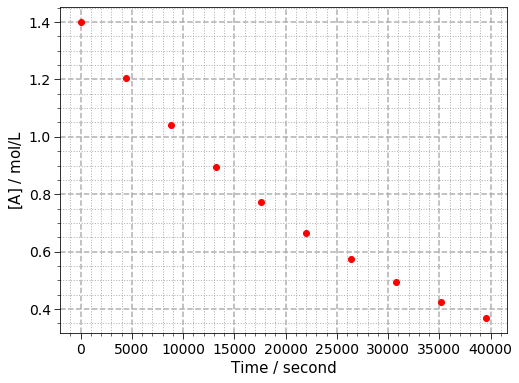

In [3]:
ex01.plot()

The plot can be customized with the chemical formula and some other parameters. Let's plot the same graph with the chemical formula and with a linear fit line:

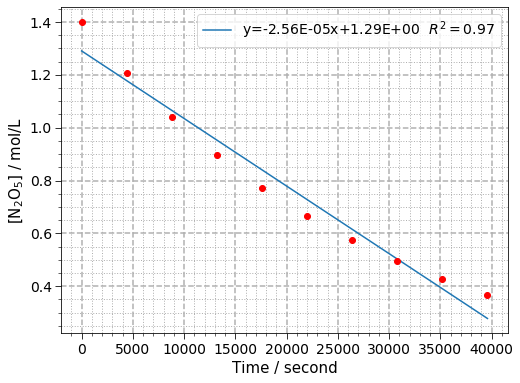

In [4]:
ex01.plot(formula='N2O5', linear_fit=True)

As expected, the linear fit is not so good since first order reactions gives a better fit in plots natural logarithm of the concentration vs time. We can plot this with parameter `plot_type='ln_conc'`

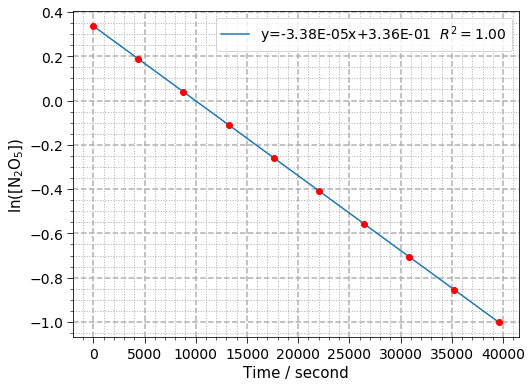

In [5]:
ex01.plot(formula='N2O5', linear_fit=True, plot_type='ln_conc')

As can be seen, now the linear fit is good and the absolute value of the angular coefficient equals the rate constant.

The `plot` method has a parameter called `ax` that can receive a `matplotlib.axes` where the plot will be shown. If no axes are passed, the method will create one an plot in it. So the user can create and pass your own axes and save the plot if desired:

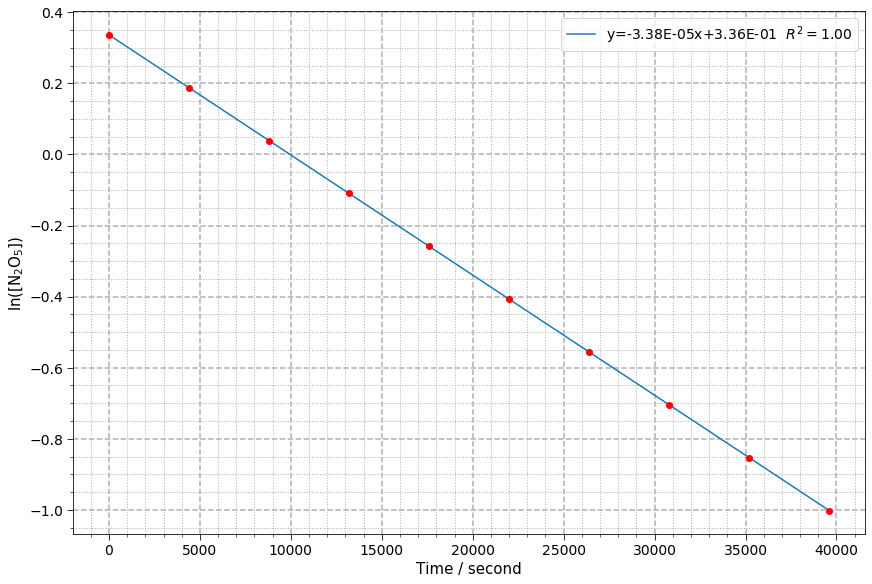

In [6]:
import matplotlib.pyplot as plt

fig01, ax01 = plt.subplots(figsize=(12,8), constrained_layout=True, facecolor=(1.0, 1.0, 1.0))

ex01.plot(ax=ax01, formula='N2O5', linear_fit=True, plot_type='ln_conc')

plt.show()

fig01.savefig('saves/ex01_ln_conc.png', dpi=300)

For second order reactions, a plot of the inverse of the concentration *vs* time is a straight line. For this kind of plot we can pass `plot_type='inv_conc'`:

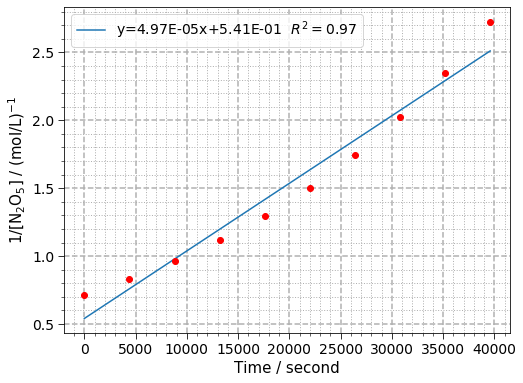

In [7]:
ex01.plot(formula='N2O5', linear_fit=True, plot_type='inv_conc')

Since the given reaction is a first order one, the above plot is clearly not linear.

The half-life can be obtained by:

In [8]:
ex01.half_life

20507.313034317907+/-0

The value has no uncertainty since the initial values were passed without uncertainties. The module relies on [uncertainties package](https://pythonhosted.org/uncertainties/) so functions and methods from this package work as well:

In [9]:
ex01.half_life.nominal_value  # nominal value

20507.313034317907

In [10]:
ex01.half_life.std_dev  # standard deviation (uncertainty, error)

0.0

The simulated concentration and time values be seem:

In [11]:
ex01.conc_array_u

array([1.4+/-0, 1.2065345432389083+/-0, 1.039804002877658+/-0,
       0.8961138911928455+/-0, 0.7722802602860005+/-0,
       0.6655591507832821+/-0, 0.5735857899919878+/-0,
       0.4943221922402225+/-0, 0.4260120003052947+/-0,
       0.3671415672876018+/-0], dtype=object)

In [12]:
ex01.time_array_u

array([0.0+/-0, 4400.0+/-0, 8800.0+/-0, 13200.0+/-0, 17600.0+/-0,
       22000.0+/-0, 26400.0+/-0, 30800.0+/-0, 35200.0+/-0, 39600.0+/-0],
      dtype=object)

With the concentration and time arrays, the user can create your own plots and analysis if the given methods are not useful for the user needs.

The data can be exported to a csv file so that it can be passed to students as an exercise to find out the reaction order for the data set. By default, the compound label is simply `[A]`. It can be changed.

In [13]:
ex01.export_csv(filename='saves/tutorial_ex01')

Let's see the exported data:

In [14]:
!cat saves/tutorial_ex01.csv

# [A],[A] error,time,time error
1.399999999999999911e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00
1.206534543238908297e+00,0.000000000000000000e+00,4.400000000000000000e+03,0.000000000000000000e+00
1.039804002877658062e+00,0.000000000000000000e+00,8.800000000000000000e+03,0.000000000000000000e+00
8.961138911928454576e-01,0.000000000000000000e+00,1.320000000000000000e+04,0.000000000000000000e+00
7.722802602860004972e-01,0.000000000000000000e+00,1.760000000000000000e+04,0.000000000000000000e+00
6.655591507832820941e-01,0.000000000000000000e+00,2.200000000000000000e+04,0.000000000000000000e+00
5.735857899919878378e-01,0.000000000000000000e+00,2.640000000000000000e+04,0.000000000000000000e+00
4.943221922402225021e-01,0.000000000000000000e+00,3.080000000000000000e+04,0.000000000000000000e+00
4.260120003052946802e-01,0.000000000000000000e+00,3.520000000000000000e+04,0.000000000000000000e+00
3.671415672876017777e-01,0.000000000000000000e+00,3.9600000000000000

Changing the compound label:

In [15]:
ex01.export_csv(filename='saves/tutorial_ex01_formula', conc_label='[N2O5]')

In [16]:
!cat saves/tutorial_ex01_formula.csv

# [N2O5],[N2O5] error,time,time error
1.399999999999999911e+00,0.000000000000000000e+00,0.000000000000000000e+00,0.000000000000000000e+00
1.206534543238908297e+00,0.000000000000000000e+00,4.400000000000000000e+03,0.000000000000000000e+00
1.039804002877658062e+00,0.000000000000000000e+00,8.800000000000000000e+03,0.000000000000000000e+00
8.961138911928454576e-01,0.000000000000000000e+00,1.320000000000000000e+04,0.000000000000000000e+00
7.722802602860004972e-01,0.000000000000000000e+00,1.760000000000000000e+04,0.000000000000000000e+00
6.655591507832820941e-01,0.000000000000000000e+00,2.200000000000000000e+04,0.000000000000000000e+00
5.735857899919878378e-01,0.000000000000000000e+00,2.640000000000000000e+04,0.000000000000000000e+00
4.943221922402225021e-01,0.000000000000000000e+00,3.080000000000000000e+04,0.000000000000000000e+00
4.260120003052946802e-01,0.000000000000000000e+00,3.520000000000000000e+04,0.000000000000000000e+00
3.671415672876017777e-01,0.000000000000000000e+00,3.9600000000

## Example 02 - first order reaction - pressure instead of concentration - without uncertainties

Azomethane decomposes according to the following equation:

$$
CH_3N_2CH_3(g) \rightarrow CH_3CH_3(g) + N_2(g)
$$

From the same Kotz's book cited in the first example, we get that this is a first order reaction with rate constant of $3.6\cdot10^{-4} s^{-1}$ at 600 K. A KineticsGenerator object can be created with rate constant simulating an initial *pressure* instead of concentration. Remember, the module does not consider units so the creation is the same as before. In this example, let's create 20 simulated points instead of 10 from the previous example, given a time interval of 5000 seconds.

In [17]:
ex02 = kinetics.KineticsGenerator(conc0=8.20e-2, rate_constant=3.6e-4, order=1, time=5000, size=20)

Since it a gas experiment, when plotting it would be nice to have pressure instead of concentration in the vertical axis label. This is simple, the `plot` method has parameters for the type of measure (`conc_or_p` stands for concentration or pressure; `conc_unit` that allows to change the plot unit).

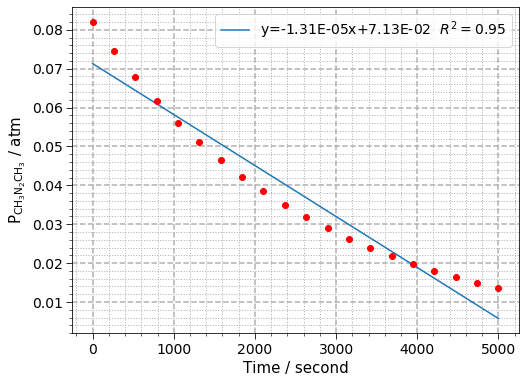

In [18]:
ex02.plot(plot_type='conc', conc_or_p='p', formula='CH3N2CH3', conc_unit='atm', linear_fit=True)

Since it is a first order reaction, the best linear fit will be for the following plot:

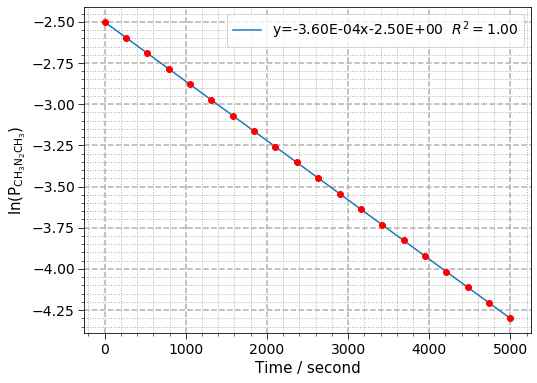

In [19]:
ex02.plot(plot_type='ln_conc', conc_or_p='p', formula='CH3N2CH3', conc_unit='atm', linear_fit=True)

## Example 03 - second order reaction - changing time unit - with uncertainties

The decomposition of $NO_2$ is a second-order process.

$$
NO_2(g) \rightarrow NO(g) + \frac{1}{2} O_2(g)
$$

This is a second order reaction with rate constant of $33.5 L\cdot mol^{-1}\cdot min^{-1}$ at 300 °C.

Suppose we have an uncertainty (standard deviation) of 0.15 in rate constant, 0.0005 in the initial concentration and 0.02 in time. The object creation will be:

In [20]:
ex03 = kinetics.KineticsGenerator(conc0=0.020, rate_constant=33.5, order=2, 
                                  time=5, sigma_conc=0.0005, sigma_rate=0.15, 
                                  sigma_time=0.02, size=20)

Since the rate constant is expressed in minutes, we must change the time axis label when creating a plot:

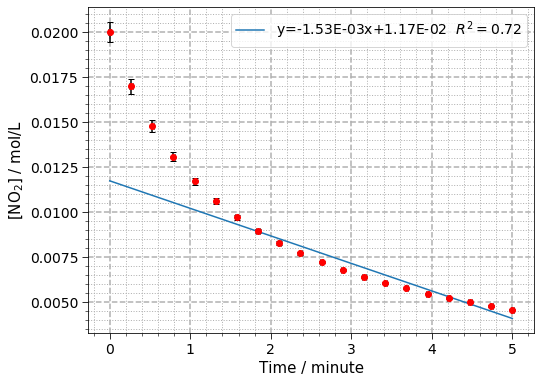

In [21]:
ex03.plot(formula='NO2', time_unit='minute', linear_fit=True)

Now we see error bars in the plot. The module uses the input data and calculates the error propagation. The linear fit is done with ODR ([orthogonal distance regression](https://en.wikipedia.org/wiki/Deming_regression#Orthogonal_regression)) since both variables (concentration and time) have uncertainties.

Let's plot the other two graphs. Note that the error bars size changes, since the module takes into account the correct propagation for each mathematical operation.

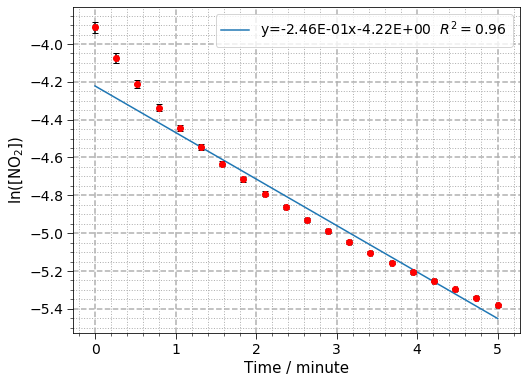

In [22]:
ex03.plot(formula='NO2', time_unit='minute', linear_fit=True, plot_type='ln_conc')

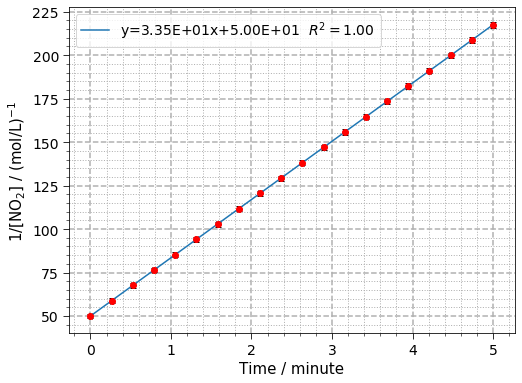

In [23]:
ex03.plot(formula='NO2', time_unit='minute', linear_fit=True, plot_type='inv_conc')

The module also calculates the half-life for second order reactions (as well as for zero order ones):

In [24]:
ex03.half_life

1.4925373134328357+/-0.03790718662339415

Exporting the data:

In [25]:
ex03.export_csv(filename='saves/tutorial_ex03_formula', conc_label='[NO2]')

In [26]:
!cat saves/tutorial_ex03_formula.csv

# [NO2],[NO2] error,time,time error
2.000000000000000042e-02,5.672953375447395506e-04,0.000000000000000000e+00,2.000000000000000042e-02
1.700223713646532506e-02,4.101375318600487124e-04,2.631578947368420907e-01,2.000000000000000042e-02
1.478599221789883393e-02,3.105431823045275781e-04,5.263157894736841813e-01,2.000000000000000042e-02
1.308089500860585078e-02,2.435189973577596618e-04,7.894736842105263275e-01,2.000000000000000042e-02
1.172839506172839580e-02,1.962914270283322318e-04,1.052631578947368363e+00,2.000000000000000042e-02
1.062937062937062936e-02,1.617817604607142581e-04,1.315789473684210398e+00,2.000000000000000042e-02
9.718670076726340992e-03,1.358112750560590699e-04,1.578947368421052655e+00,2.000000000000000042e-02
8.951707891637222109e-03,1.157846783374251454e-04,1.842105263157894690e+00,2.000000000000000042e-02
8.296943231441047950e-03,1.000214174873106557e-04,2.105263157894736725e+00,2.000000000000000042e-02
7.731434384537131006e-03,8.739459604305376396e-05,2.368421052631

## Example 04 - zero order reaction - changing concentration unit - with uncertainties

The decomposition of $NH_3$ is a zero-order process.

$$
NH_3(g) \rightarrow \frac{1}{2}N_2(g) + \frac{3}{2} H_2(g)
$$

This is a zero order reaction with rate constant of $1.5\cdot10^{-3} mmol\cdot L^{-1}\cdot s^{-1}$ at 856 °C.

Suppose we have an uncertainty (standard deviation) of 0.0001 in rate constant, 0.0005 in the initial concentration and 0.02 in time. The object creation will be:

In [27]:
ex04 = kinetics.KineticsGenerator(conc0=1.75, rate_constant=1.5e-3, order=0, 
                                  sigma_conc=0.0005, sigma_rate=0.0001, 
                                  sigma_time=0.02, size=20)

By default, the time interval is 1000.

Beware that the concentration in the rate constant is mmol. Then:

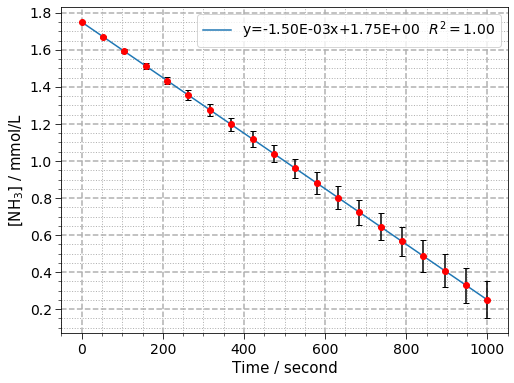

In [28]:
ex04.plot(plot_type='conc', formula='NH3', linear_fit=True, conc_unit='mmol/L')

# Version information

In [29]:
%load_ext version_information
%version_information numpy, matplotlib, uncertainties, scipy

Software versions
Python 3.6.10 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 5.3.0 40 generic x86_64 with debian buster sid
numpy 1.18.1
matplotlib 3.1.3
uncertainties 3.1.2
scipy 1.4.1
Thu Mar 05 16:38:59 2020 -03